In [28]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np

In [2]:
# Loading the dataset

solar_dataset = pd.read_excel("Junior Data Analyst _ Data.xlsx", skiprows=2) 
solar_dataset.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [3]:
# Shape of the data 

solar_dataset.shape

(8760, 4)

In [4]:
# Data types 

solar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [5]:
# Missing values 

solar_dataset.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

### 1. Data Visualization and Checks 

**Goal:** Visualizing and comparing average solar electricity generation and electricity usage for each hour in a day

In [6]:
solar_dataset.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


Text(0, 0.5, 'Electricity (kW/h')

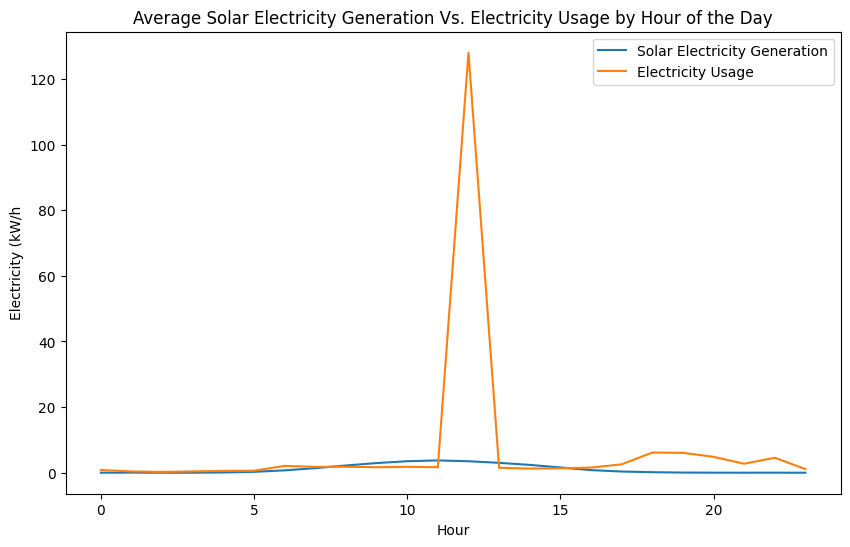

In [16]:
average_df = solar_dataset.groupby("Hour").agg({"Solar electricity generation (kWh)": "mean", "Electricity usage (kWh)": "mean"}).reset_index() 

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.lineplot(data=average_df, x="Hour", y="Solar electricity generation (kWh)", label="Solar Electricity Generation")
sns.lineplot(data=average_df, x="Hour", y="Electricity usage (kWh)", label="Electricity Usage") 

plt.title("Average Solar Electricity Generation Vs. Electricity Usage by Hour of the Day") 
plt.xlabel("Hour") 
plt.ylabel("Electricity (kW/h")

<Axes: ylabel='Electricity usage (kWh)'>

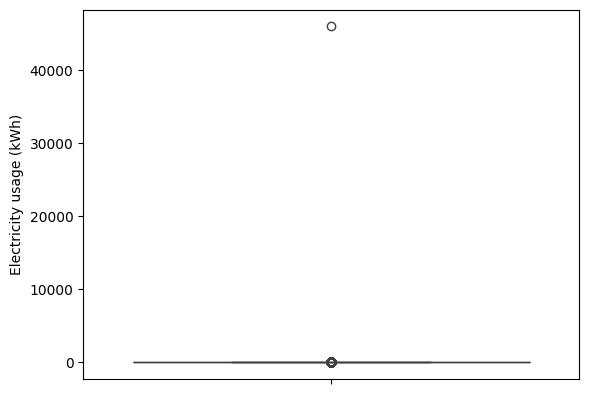

In [17]:
sns.boxplot(data=solar_dataset, y="Electricity usage (kWh)")

In [26]:
solar_dataset.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,6767.000000,6767,6767.000000,6767.000000
mean,10.987735,2020-07-03 12:32:15.392345600,0.450467,0.927869
min,0.000000,2020-01-01 00:00:00,0.000000,-0.217500
25%,4.000000,2020-03-28 08:30:00,0.000000,0.305969
50%,10.000000,2020-07-06 06:00:00,0.012000,0.591000
75%,17.000000,2020-10-08 07:30:00,0.586500,1.296000
max,23.000000,2020-12-31 23:00:00,3.315000,3.755400
std,7.413926,NaN,0.777718,0.838939


<Axes: ylabel='Solar electricity generation (kWh)'>

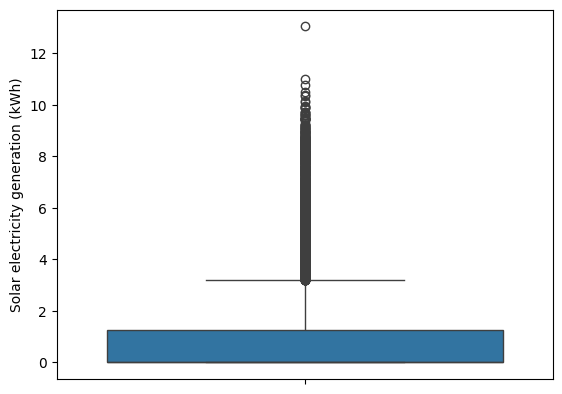

In [9]:
sns.boxplot(data=solar_dataset, y="Solar electricity generation (kWh)")

<Axes: >

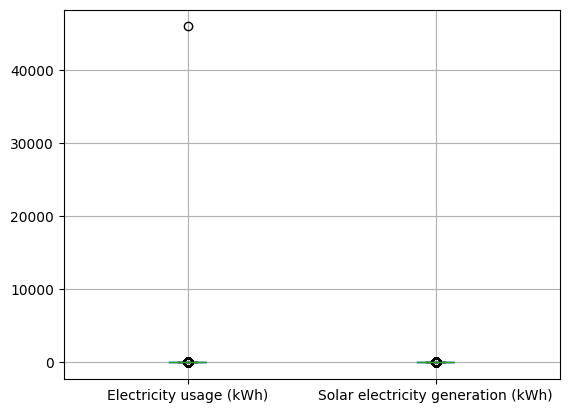

In [18]:
# Checking for outliers 

solar_dataset.boxplot(column=["Electricity usage (kWh)", "Solar electricity generation (kWh)"])

<Axes: ylabel='Solar electricity generation (kWh)'>

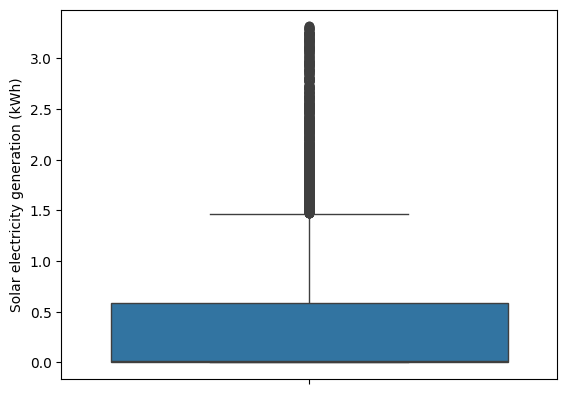

In [21]:
# Remove outliers for Electricity Usage 

# Lower Quartile
Q1 = solar_dataset["Solar electricity generation (kWh)"].quantile(0.25)

# Upper quartile
Q3 = solar_dataset["Solar electricity generation (kWh)"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_boundary = Q1 - IQR * 1.5 

upper_boundary = Q3 + IQR * 1.5 

# IRemoving outliers 
solar_dataset = solar_dataset[~((solar_dataset["Solar electricity generation (kWh)"] < lower_boundary) | (solar_dataset["Solar electricity generation (kWh)"] > upper_boundary))] 

sns.boxplot(data=solar_dataset, y="Solar electricity generation (kWh)")


<Axes: ylabel='Electricity usage (kWh)'>

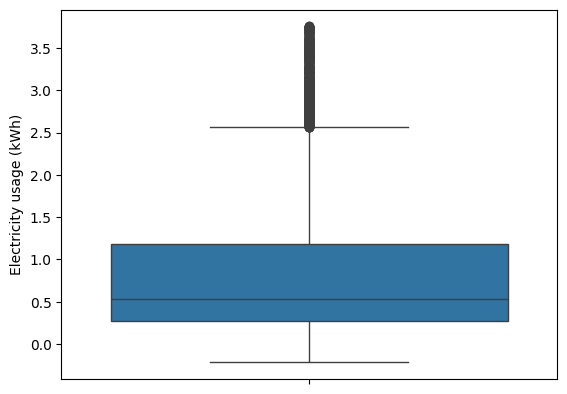

In [20]:
# Lower Quartile
Q1 = solar_dataset["Electricity usage (kWh)"].quantile(0.25)

# Upper quartile
Q3 = solar_dataset["Electricity usage (kWh)"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_boundary = Q1 - IQR * 1.5 

upper_boundary = Q3 + IQR * 1.5 

# IRemoving outliers 
solar_dataset = solar_dataset[~((solar_dataset["Electricity usage (kWh)"] < lower_boundary) | (solar_dataset["Electricity usage (kWh)"] > upper_boundary))] 

sns.boxplot(data=solar_dataset, y="Electricity usage (kWh)") 

In [22]:
# New Averages without outliers

average_df = solar_dataset.groupby("Hour").agg({"Solar electricity generation (kWh)": "mean", "Electricity usage (kWh)": "mean"}).reset_index() 

Text(0, 0.5, 'Electricity (kW/h')

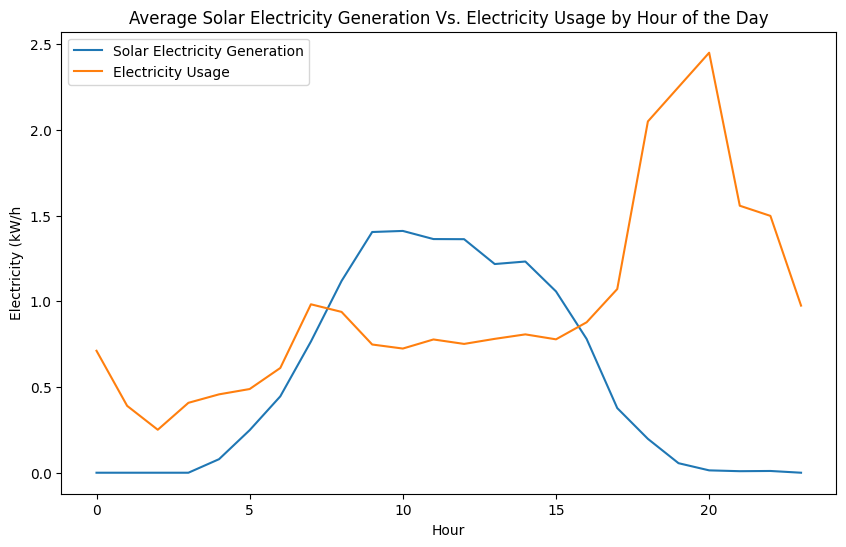

In [24]:
average_df = solar_dataset.groupby("Hour").agg({"Solar electricity generation (kWh)": "mean", "Electricity usage (kWh)": "mean"}).reset_index() 

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.lineplot(data=average_df, x="Hour", y="Solar electricity generation (kWh)", label="Solar Electricity Generation")
sns.lineplot(data=average_df, x="Hour", y="Electricity usage (kWh)", label="Electricity Usage") 

plt.title("Average Solar Electricity Generation Vs. Electricity Usage by Hour of the Day") 
plt.xlabel("Hour") 
plt.ylabel("Electricity (kW/h")

### 2. Calculating Electricity Bought 

We want to calculate the amount of electricity that needs to be bought from the provider 

By substracting electicity usage from solar electicity generation as follows; 

    "Electricity usage (kWh)" - "Solar Electricity Generation"

The difference will give use the electricity that still needs to be bought from the provider 

    `np.maximum(0, ...)`

Ensures that the result is never negative

    

In [32]:
solar_dataset["electricity_bought"] = np.maximum(0, solar_dataset["Electricity usage (kWh)"] - solar_dataset["Solar electricity generation (kWh)"]) 

solar_dataset.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000


### 3. Calculating Excess Solar Generation 

We electricity usage from electricity generated from solars. 

The difference is the excess electricity generated by the solar 

In [35]:
solar_dataset["excess_solar_generation"] = np.maximum(0, solar_dataset["Solar electricity generation (kWh)"] - solar_dataset["Electricity usage (kWh)"]) 

solar_dataset.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar_electricity,excess_solar_generation
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,0.0
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,0.0
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,0.0
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,0.0
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,0.0


### 4. Model Battery Charge Level